# Introduction to Word Embeddings

## Contents
- why do we need to use embeddings?
- Bag of Words Model(BoW) 
- Tfidf 
- Neural Network 
- pretrained
  - glove
  - word 2 vec
  - gensim

### Why do we need to use embeddings?
Machine doen't have capabiltiy to process the text in the raw format.Machines can only process numbers. so we need a way to feed them to machine.

In [10]:
import numpy as np

# Bag of words model

In [ ]:
Vocabulary =['I', 'imtech', 'Nikhil', 'form', 'am', 'mtech', 'IIIT', 'Bangalore']

doc1 = "I am Nikhil from IIIT Bangalore"
doc2 = "am I Nikhil from IIIT Bangalore"
doc3 = "We all are from IIIT Bangalore"

doc1_tokens = ["I", "am", "Nikhil", "from", "IIIT", "Bangalore"]
doc2_tokens = ["am", "I", "Nikhil", "from", "IIIT", "Bangalore"]
doc3_tokens = ["We", "all", "are", "from", "IIIT", "Bangalore"]      

docs = [[1,1,1,1,1,1],
        [0,0,0,1,1,1],
        [1,1,1,1,1,1]]

#### Scikit-learn library provides a scheme for achieving BoW.
#### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
docs = [ "I am Nikhil from IIIT Bangalore",
         "am I Nikhil from IIIT Bangalore",
         "We all are from IIIT Bangalore" ]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(docs)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(docs)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

In [ ]:
doc1 = ["Bag of words is the best for word embeddings","no way this is best"]
vector = vectorizer.transform(doc1)
print(vector.toarray())

#### Some drawbacks of the bag of words?

## TF- IDF

#### Term Fequency(TF) - frequency of the word in that particular document
- This summarizes how often a given word appears within a document
- TF(t) = No of times term **t** apprears in a document / Total no of terms in the document

#### Inverse Document Frequency  
- This downscales words that appear a lot across documents.
- IDF(t) = ln(Total no of documents / No of documents with term t in it)

#### TF- IDF
- TF-IDF(t) = TF(t) * IDF(t)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["I am Nikhil from IIIT Bangalore",
         "We all are from IIIT Bangalore",
         "am I Nikhil from IIIT Bangalore" ]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

In [ ]:
doc1 = ["Bag of words is the best for word embeddings","no way this is best"]
doc2 = ["Is tf-idf better than Bag Of words","depends!"]
vector1 = vectorizer.transform(doc1)
vector2 = vectorizer.transform(doc2)
print(vector1.toarray())
print(vector2.toarray())

## Introduction to neural networks 

For understanding the neural networks, consider the below architecture, here X1 , X2 are the inputs and b is the bias term,
The weighted linear combination that is the term 
               
               (w1.X1 + w2.X2 + b) 
               
  is nothing but the linear regression. 
 This regression is passed through an activation function in the circle 
                        
                      Y =  f(w1.X1 + w2.X2 +b)
             
  This activation fucntion let the model to learn non linear dependancy between the data points. 
                     ![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png?w=568&h=303)

One of the method of training the above neuron is using gradient descent. For that we first need to define the loss function L, 

                    L = f(y, Y)
   
   There can be many loss functions like cross entropy, MSE etc. But to simplify the calculation the loss assumed as a variable L. The gradient of L with respect to the weights can be defined as, 
   
                      G = dL/dw 
                        = (dL/df)*(df/dw)     (by chain rule of differentiation)
Now for the back propagation, we correct the weights w with respect to the gradient as, 
    
    
                     w(new) = w(old) - (alpha)*(G) 
Similar calculation we repeat for the bias b term.
                      

This is just a single neuron, what if we have multiple layers?? Then the model will be able to learn the non linear the non linear relationships. Lets see that with a interative plot, 
     [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.47613&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

These are the links to learn about the word embedding mentioned in the tutorial, I have also added them in the notebook,
 - [Word2vec part 1](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
 - [Word2vec part 2](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)
 - [HERE](https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf) is a article to understand about neural network working and intuition
 - [This](http://web.stanford.edu/class/cs224n/slides/cs224n-2020-lecture01-wordvecs1.pdf) is the link to
 understand about the gradient descent and back-propagation.

## Word embeddings

When we are working with a text, computers cannot understand the text, they only understand the numbers. But how do we change a text to a vector. As seen above there were some methods that can change a word to a vector based on the number of occurences. Is there any efficient method to do so? 



There are some ways to change a word to a vector and we will see how these vectors closer to each other belong to a catogary. We can also check their cosine distances are small if they occure in similar context, and we can work analogies too for those. 

Lets first take a look at some of the pretrained word embeddings and then we will see how to train your own word embeddings. 

## Glove word embeddings 

In [8]:
# !wget "http://nlp.stanford.edu/data/glove.6B.zip"
# !unzip "./glove.6B.zip"


In [15]:
print('Loading word vectors...')
word2vec = {}
embedding = []
idx2word = []
with open('./glove.6B.50d.txt', encoding='utf-8') as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
        embedding.append(vec)
        idx2word.append(word)
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


Lets see how well they work in terms of distances as well as for the analogies task 

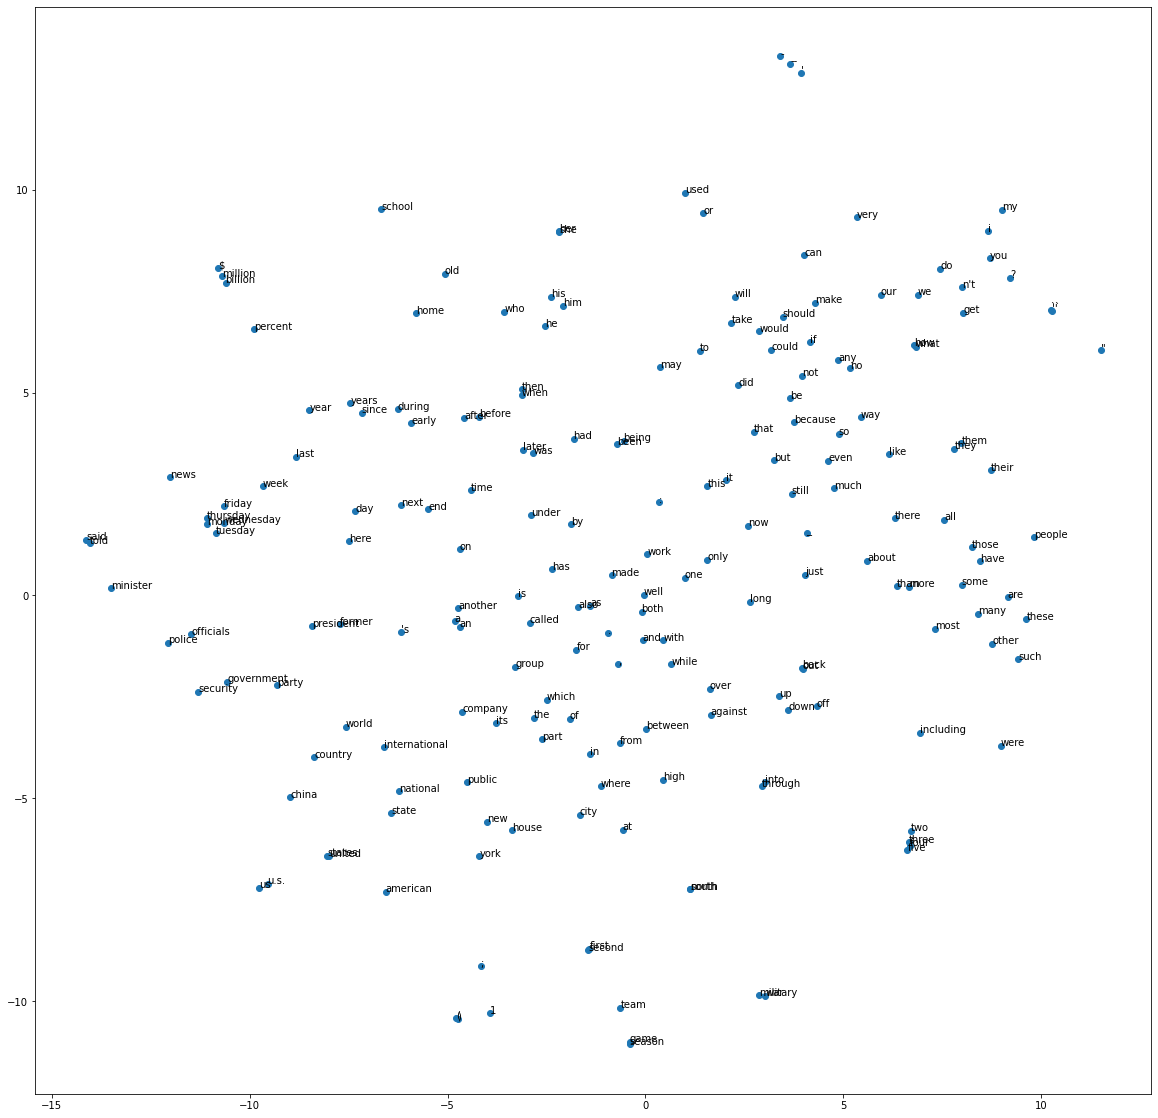

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
idx_2_words_dict = {k:v for k, v in enumerate(idx2word)}
tsne = TSNE()


num_of_words = 200


Z = tsne.fit_transform(embedding[:num_of_words])
plt.figure(figsize= (20,20))
plt.scatter(Z[:,0], Z[:,1])
for i in range(num_of_words):
        try:
            plt.annotate(s=idx_2_words_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
        except:
            print("bad string:", idx2word[i])
plt.draw()

## Word2vec

Lets first look at the pretrained word2vec embeddings, which can be downloaded from [here](http://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)

In [52]:
# !wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [55]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format(
  './GoogleNews-vectors-negative300.bin.gz',
  binary=True
)

In [58]:
def find_analogies(w1, w2, w3):
    r = word_vectors.most_similar(positive=[w1, w3], negative=[w2])
    print("%s - %s = %s - %s" % (w1, w2, r[0][0], w3))

def nearest_neighbors(w):
    r = word_vectors.most_similar(positive=[w])
    print("neighbors of: %s" % w)
    for word, score in r:
        print("\t%s" % word)

In [59]:
find_analogies('king', 'man', 'woman')
find_analogies('france', 'paris', 'london')
find_analogies('france', 'paris', 'rome')

king - man = queen - woman
france - paris = england - london
france - paris = italy - rome


In [60]:
nearest_neighbors('king')
nearest_neighbors('france')
nearest_neighbors('japan')

neighbors of: king
	kings
	queen
	monarch
	crown_prince
	prince
	sultan
	ruler
	princes
	Prince_Paras
	throne
neighbors of: france
	spain
	french
	germany
	europe
	italy
	england
	european
	belgium
	usa
	serbia
neighbors of: japan
	japanese
	tokyo
	america
	europe
	germany
	chinese
	india
	hawaii
	usa
	korea


We saw the pretrained glove word and word2vec embeddings, but what if the pretrained embeddings is not having the words (example slangs), can we train our own??
Gensim library is there so that we can train out own embeddings word2vec, word2vec differs from the glove in terms of their mathematical implimenatation but both provide with good embeddings that can be used for the NLP tasks. 

We saw a neural network, what if we train a NN that can generate the word embeddings? 

![](https://devopedia.org/images/article/221/9279.1570465016.png)

The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

This is the vocabulary on which the model is trained:  ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final', 'This', 'day', 'Towmorrow', 'will', 'be', 'of', 'week', 'sunday.', 'moreday']
This is the generated output dimension:  (100,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


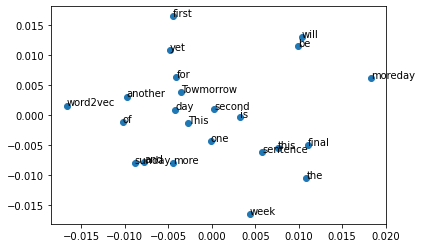

In [67]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence'], ['This', 'is', 'the', 'first', 'day' , 'for' , 'word2vec'],
 ['Towmorrow',  'will','be','second','for' , 'word2vec'],
 ['yet', 'another','day', 'of', 'the', 'week', 'will', 'be', 'sunday.'],
            ['and' , 'one' , 'more', 'day', 'will' , 'for' , 'word2vec']]
# train model
# model = Word2Vec(sentences, min_count=1)
model = Word2Vec(sentences, min_count=1)

# summarize vocabulary


words = list(model.wv.vocab)
print("This is the vocabulary on which the model is trained: ", words)
# access vector for one word
print("This is the generated output dimension: " ,model['week'].shape)

# print(new_model)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
